# Collisional excitation / collisional de-excitation

- formula:
  - collisional excitation: [Regemorter 1961](https://doi.org/10.1086%2F147445)
  - collisional de-excitation: [Regemorter 1961](https://doi.org/10.1086%2F147445)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import lss

from utils import *

In [2]:
elements = [
    lss.O1Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
# elements[0].keys = elements[0].all_keys
# elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]
# elements[0].keys = ["12P3P4", "12P1D4"]
elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
# population_nlte_1[0] = 1.0
# 12P1D4 LTE
# population_nlte_1[0] = 0.94581275482902
# population_nlte_1[1] = 0.0541872451709805
# 13S3S LTE
population_nlte_1[0] = 0.999994639654863
population_nlte_1[1] = 5.36034513744371e-6

# delta_time = 0.01
delta_time = 1.0e-20
# delta_time = 1.0e-30

count = int(1e5)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
# electron_number_densities = np.linspace(1.0e1, 1.0e20, num=count)

# electron_number_densities = np.linspace(86629.2218723125, 1.0e12, num=count)
# electron_number_densities = np.linspace(1.0e4, 86629.2218723125, num=count)

# electron_number_densities = np.linspace(63621693710.528, 7.0e22, num=count)

# 12P1D4
# electron_number_densities = np.full(count, 8e19)

# 13S3S
electron_number_densities = np.full(count, 5.0e24)


In [3]:
se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]

b_factors = calculate_b_factors(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
    ]
)

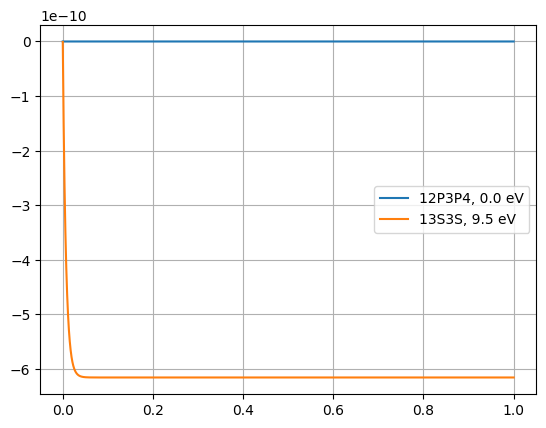

In [4]:
for s, element in enumerate(elements):
    for i, key in enumerate(element.keys):
        plt.plot(
            np.linspace(0.0, 1.0, num=count),
            np.log10(b_factors.T[i + sum([len(el.keys) for el in elements][:s])]),
            label=f"{key}, {'{:.1f}'.format(element.levels[i].energy)} eV",
        )
plt.legend()
plt.grid()
plt.show()

In [5]:
elements = [
    lss.O1Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
# elements[0].keys = elements[0].all_keys
# elements[0].keys = ["12P3P4", "12P1D4", "13S3S"]
# elements[0].keys = ["12P3P4", "12P1D4"]
elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
# population_nlte_1[0] = 1.0
# population_nlte_1[0] = 0.999994639654863
# population_nlte_1[1] = 5.36034513744371e-6
population_nlte_1[0] = 0.9999999999999991
population_nlte_1[1] = 8.42538693553854e-16


delta_time = 1.0e-20

count = int(1e3)
temperatures = np.full(count, 1.0e4)
electron_temperatures = np.full(count, 1.0e4)
electron_number_densities = np.linspace(1.0e1, 1.0e30, num=count)
# electron_number_densities = np.linspace(1.0e20, 1.0e30, num=count)

In [6]:
se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]

populations_nlte = calculate_populations_nlte(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
    ]
)

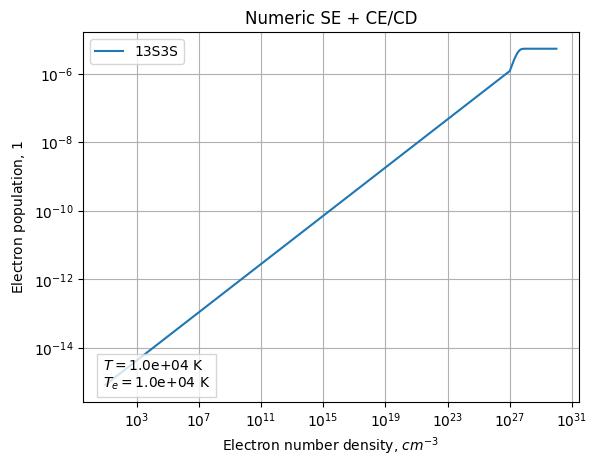

In [7]:
fig, ax = plt.subplots()

plt.plot(
    electron_number_densities,
    populations_nlte.T[1],
    label=elements[0].keys[1],
)
plt.legend()
plt.grid()
plt.title("Numeric SE + CE/CD")
plt.xlabel("Electron number density, $cm^{-3}$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.text(
    0.04,
    0.04,
    f"$T = ${'{:.1e}'.format(temperatures[0])} K\n"
    f"$T_e = ${'{:.1e}'.format(electron_temperatures[0])} K",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.show()

In [8]:
elements = [
    lss.O1Inasan(),
]
"""
13S3S - fast level
12P1D4 - 
"""
elements[0].keys = ["12P3P4", "13S3S"]

population_nlte_1 = np.zeros(sum([len(el.keys) for el in elements]))
population_nlte_1[0] = 0.9999999999991575
population_nlte_1[1] = 8.42538561256093e-13


# delta_time = 1.0e-20
delta_time = 1.0e-20

count = int(1e3)
temperatures = np.linspace(1.0e4, 1.0e30, num=count)
electron_temperatures = np.full(count, 1.0e4)
# electron_temperatures = temperatures
electron_number_densities = np.full(count, 1.0e27)

In [9]:
se = [
    Transition.SE_NIST_O1,
]
ce_balance = [
    Transition.CE_REGEMORTER,
]

populations_nlte = calculate_populations_nlte(
    elements=elements,
    population_nlte_1=population_nlte_1,
    temperatures=temperatures,
    electron_temperatures=electron_temperatures,
    electron_number_densities=electron_number_densities,
    delta_time=delta_time,
    transitions_types=[
        *se,
        *ce_balance,
    ]
)

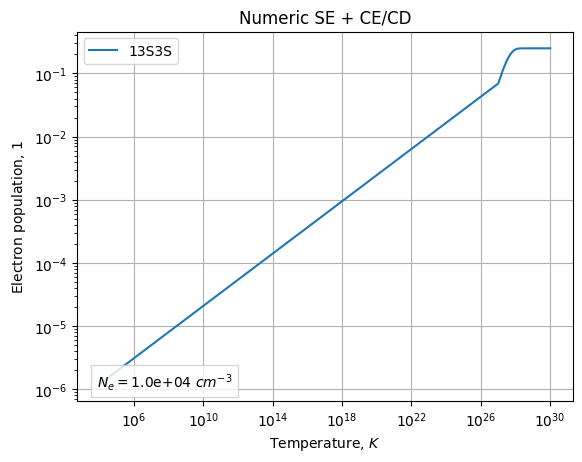

In [10]:
fig, ax = plt.subplots()

plt.plot(
    temperatures,
    populations_nlte.T[1],
    label=elements[0].keys[1],
)
plt.legend()
plt.grid()
plt.title("Numeric SE + CE/CD")
plt.xlabel("Temperature, $K$")
plt.ylabel("Electron population, $1$")
plt.xscale("log")
plt.yscale("log")
plt.text(
    0.04,
    0.04,
    f"$N_e = ${'{:.1e}'.format(electron_temperatures[0])} $cm^{{-3}}$",
    transform = ax.transAxes,
    bbox={'facecolor': 'white', 'alpha': 0.8, 'edgecolor': (0.8, 0.8, 0.8)}
)
plt.show()